In [22]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,Lasso,ElasticNet


In [2]:
def extract_from_scv(file_path):
    data = pd.read_csv(file_path)
    return data

data = extract_from_scv('C:/Users/nader/Desktop/machinlearning-exercise-2/data/used_cars.csv')

In [3]:
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.shape


(8128, 13)

In [5]:
data.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:

data.dtypes


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:

data.nunique()


name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [8]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:

data.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:

data.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:

data.corr(numeric_only=True)


,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


In [12]:

(data=='?').sum()



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [13]:
data=data.drop('name',axis=1)
data=data.drop('torque', axis=1)
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [14]:
def drop_all_nan_records(df):
    return df.dropna(how="all", axis=0)

def one_hot_encoder(data, columns):
    return pd.get_dummies(data,columns=columns)




data["mileage"]= data['mileage'].apply(lambda value: float(str(value).split()[0]))
data["engine"]= data['engine'].apply(lambda value: float(str(value).split()[0]))
data["max_power"] = data["max_power"].replace(np.nan, "0NM")
data["max_power"] = data["max_power"].astype(str).str.extract('(\d+)').astype(float)

data["max_power"] = data["max_power"].replace(0,data["max_power"].mean())




label_encoder = LabelEncoder()   
data['fuel'] = label_encoder.fit_transform(data['fuel'])
data['seller_type']= label_encoder.fit_transform(data['seller_type'])
data['owner']=  label_encoder.fit_transform(data['owner'])


def fill_na(data):
    data.fillna(value={
        "mileage" : data.mileage.mean(),
        "engine" : data.engine.mean(),
        "max_power" : data.max_power.mean(),
        "seats" : data.seats.mean()
    }, inplace=True)
    return data


data = one_hot_encoder(data,["transmission"])


data = drop_all_nan_records(data)
data = fill_na(data)
data

,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,seats,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,1,0,23.40,1248.0,74.0,5.0,False,True
1,2014,370000,120000,1,1,2,21.14,1498.0,103.0,5.0,False,True
2,2006,158000,140000,3,1,4,17.70,1497.0,78.0,5.0,False,True
3,2010,225000,127000,1,1,0,23.00,1396.0,90.0,5.0,False,True
4,2007,130000,120000,3,1,0,16.10,1298.0,88.0,5.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,0,18.50,1197.0,82.0,5.0,False,True
8124,2007,135000,119000,1,1,1,16.80,1493.0,110.0,5.0,False,True
8125,2009,382000,120000,1,1,0,19.30,1248.0,73.0,5.0,False,True
8126,2013,290000,25000,1,1,0,23.57,1396.0,70.0,5.0,False,True


In [15]:
data.isnull().sum()


year                      0
selling_price             0
km_driven                 0
fuel                      0
seller_type               0
owner                     0
mileage                   0
engine                    0
max_power                 0
seats                     0
transmission_Automatic    0
transmission_Manual       0
dtype: int64

<AxesSubplot: >

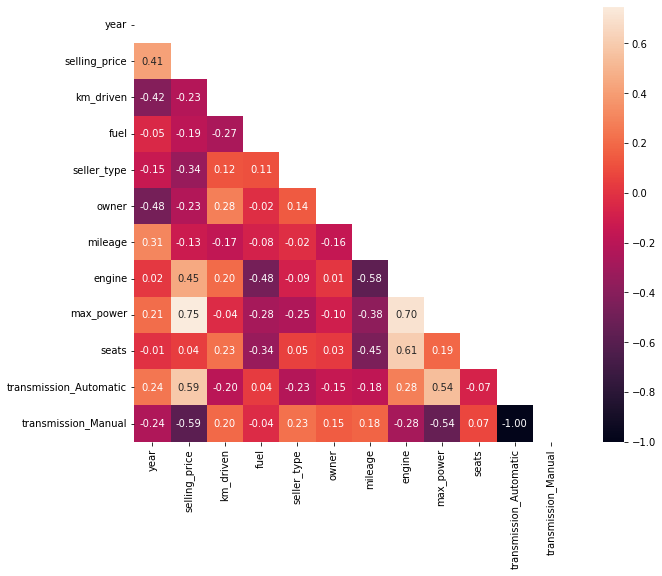

In [16]:
plt.figure(figsize=(12,8))
corr = data.corr()
mask = np.triu(corr)
sns.heatmap(corr, square=True,annot=True,mask=mask, fmt='.2f')

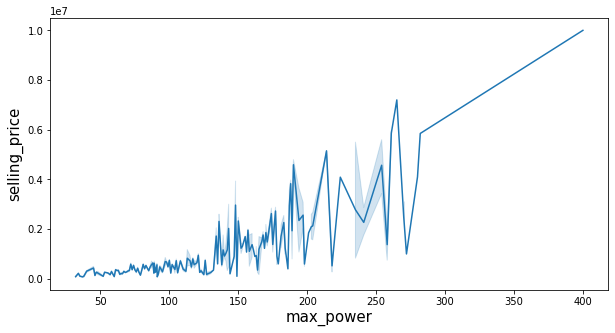

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel("max_power", fontsize = 15)
plt.ylabel("selling_price", fontsize = 15)
sns.lineplot(x = 'max_power', y = 'selling_price', data = data)
plt.show()

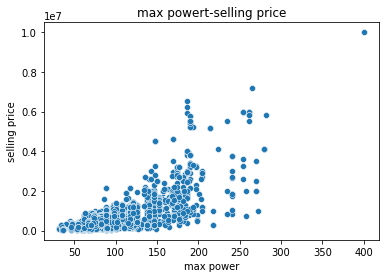

In [18]:
sns.scatterplot(x='max_power', y='selling_price', data=data)
plt.title("max powert-selling price")
plt.xlabel('max power')
plt.ylabel('selling price')
plt.show()


# single Variable linear Regression

model intercept : -904722.8995663793
model conf : [16903.36843087]
324075122346.5211 
 0.5857236644262205


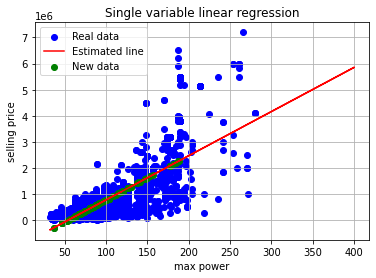

In [19]:
model = LinearRegression()
X = data[["max_power"]]

y = data["selling_price"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=64)

model.fit(X_train, y_train)

y_pred= model.predict(X_test)

print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,"\n", r2)


new_X = data[["max_power"]].sample(n=200, random_state=64)
predicted_y = model.predict(new_X)

plt.scatter(X_train['max_power'], y_train, color='blue')
plt.plot(X_test['max_power'], y_pred, color='red')
plt.scatter(new_X, predicted_y, color='green')

plt.xlabel('max power')
plt.ylabel('selling price')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)



plt.show()


<h1>Multi Variable linearRegression</h1>

model intercept : -786128.4577671682
model conf : [19069.83053275  -216.69542921]
312894231052.633 
 0.6000165809578634


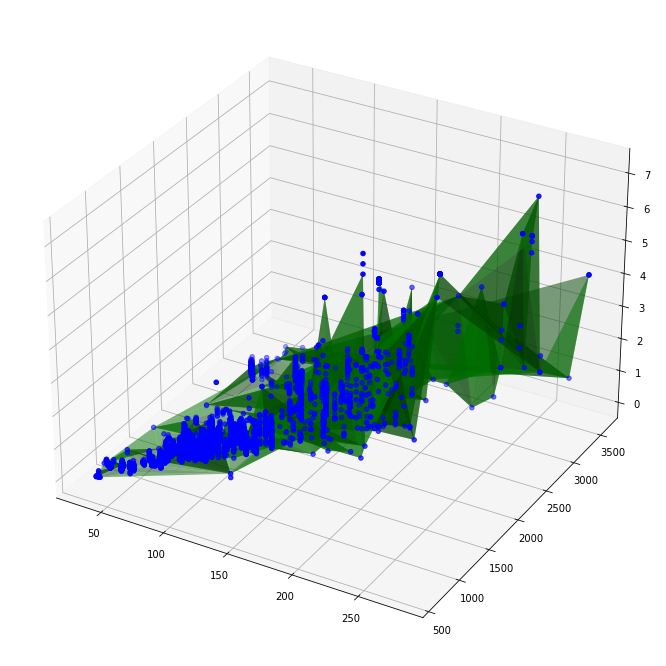

In [20]:
model = LinearRegression()
X = data[["max_power", "engine"]]
y = data["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 64)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,"\n", r2)

fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_train["max_power"], X_train["engine"],y_train, color="blue")

ax.plot_trisurf(X_train["max_power"].values.flatten(),X_train["engine"].values.flatten(),y_train.values.flatten(), color="green", alpha=0.5)

plt.show()


            

<h1>Polynomial Regression</h1>

65481319196.13926


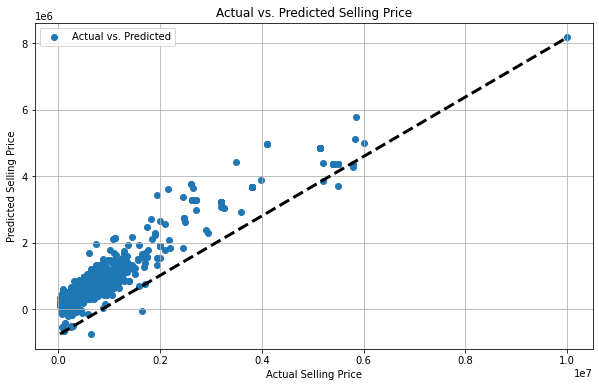

In [68]:
features = ['year', 'km_driven', 'fuel', 'seller_type','transmission_Automatic', 'transmission_Manual',
           'owner', 'mileage', 'engine', 'max_power','seats']
X = data[features]
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

model = LinearRegression()

pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(mse)
model.score(X_test_poly, y_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()



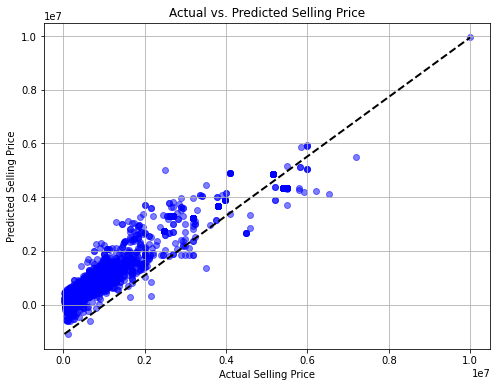

In [66]:
features = ['year', 'km_driven', 'fuel', 'seller_type','transmission_Automatic', 'transmission_Manual',
           'owner', 'mileage', 'engine', 'max_power','seats']
X = data[features]
y = data['selling_price']

piplineInput = [
    ("scale",StandardScaler()),
    #("pca",PCA(n_components=4)),
    ("polynomiam", PolynomialFeatures(include_bias=False)),
    ("model ", LinearRegression())
]

pipe = Pipeline(piplineInput)
pipe.fit(X,y)
pipe.score(X,y)


y_pred = pipe.predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.grid(True)
plt.show()

In [45]:
ridge = Ridge(alpha=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,"\n", r2)


312894232171.059 
 0.6000165795281411


In [37]:
lasso = Lasso(alpha=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,"\n", r2)

312894232675.8926 
 0.6000165788827949


In [39]:
elastic = ElasticNet(alpha=0.3,l1_ratio=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,"\n", r2)

312905152859.9666 
 0.6000026192372374


In [43]:
alphas = [round(num, 2) for num in np.arange(0.1, 1, 0.05)]
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(mse,"\n", r2,"\n",100*"=")

312894231458.2366 
 0.6000165804393665 
312894231663.86884 
 0.6000165801764996 
312894231864.0494 
 0.6000165799206021 
312894232064.2299 
 0.6000165796647043 
312894232275.5315 
 0.6000165793945903 
312894232475.7121 
 0.6000165791386926 
312894232675.8926 
 0.6000165788827949 
312894232876.0732 
 0.6000165786268973 
312894233076.2537 
 0.6000165783709996 
312894233299.12 
 0.600016578086102 
312894233499.3006 
 0.6000165778302043 
312894233699.48114 
 0.6000165775743067 
312894233899.6618 
 0.6000165773184089 
312894234099.84247 
 0.600016577062511 
312894234300.0231 
 0.6000165768066134 
312894234500.20374 
 0.6000165765507155 
312894234700.3844 
 0.6000165762948177 
312894234900.56506 
 0.6000165760389199 
